# 1. Problem formulation:

Opis problemu

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import seaborn as sns
import cmdstanpy

BINS = 20

In [8]:
audi_a3_2000ccm_standarized = pd.read_csv("data/audi_data_standarized.csv")
audi_a3_2000ccm_standarized.head()

,Price,Production_year,Mileage_km
0,0.190769,0.739130,0.472726
1,0.037814,0.434783,0.515908
2,0.071804,0.434783,0.713306
3,0.063306,0.391304,0.549999
4,0.076053,0.347826,0.545454


# 2. Model

Opis modeli

## 2.1 Model 1- prior

In [11]:
model_exp_ppc = cmdstanpy.CmdStanModel(stan_file='stan_files/exp_model_ppc.stan')

#Parameters
N = 532
mu_a =0.17
sc_a =0.02
mu_b1 = 0.36
sig_b1 = 0.02
mu_b2 = 0.36
sig_b2 = 0.02

data = {"N": N, 
        "mileage" : np.linspace(0.01,1,N),
        "production_year" : np.linspace(0.01,1,N),
        "mu_a" : mu_a,
        "sc_a" : sc_a,
        "mu_b1" : mu_b1,
        "mu_b2" : mu_b2,
        "sig_b1" : sig_b1,
        "sig_b2" : sig_b2,
        }


sim_exp_ppc=model_exp_ppc.sample(data=data)
sim_exp_ppc_pd = sim_exp_ppc.draws_pd()
sim_exp_ppc_pd.head()

22:29:17 - cmdstanpy - INFO - compiling stan file /home/car_prices_pr/DA/project/stan_files/exp_model_ppc.stan to exe file /home/car_prices_pr/DA/project/stan_files/exp_model_ppc
22:29:30 - cmdstanpy - INFO - compiled model executable: /home/car_prices_pr/DA/project/stan_files/exp_model_ppc
22:29:30 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:   1 / 1000 [  0%]  (Sampling)


chain 1 |██▎       | 00:00 Iteration: 300 / 1000 [ 30%]  (Sampling)


chain 1 |███▋      | 00:00 Iteration: 600 / 1000 [ 60%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                      
chain 2 |██████████| 00:00 Sampling completed                      
chain 3 |██████████| 00:00 Sampling completed                      


chain 4 |██████████| 00:00 Sampling completed


22:29:31 - cmdstanpy - INFO - CmdStan done processing.


,lp__,accept_stat__,price[1],price[2],price[3],price[4],price[5],price[6],price[7],price[8],...,price[528],price[529],price[530],price[531],price[532],alpha,beta1,beta2,sigma,lambda
0,0.0,0.0,0.333059,0.020696,0.028259,0.075179,0.153765,0.228860,0.436884,0.209828,...,0.288557,0.006357,0.188783,0.255531,0.054294,0.149251,0.367891,0.349214,0.137343,0.025106
1,0.0,0.0,0.160553,0.028804,0.006749,0.178111,0.204003,0.185724,0.237900,0.092274,...,0.546984,0.023141,0.037663,0.108242,0.180061,0.157481,0.362870,0.343691,0.143618,0.025009
2,0.0,0.0,0.277915,0.394002,0.111498,0.032696,0.042781,0.240747,0.007288,0.119051,...,0.011128,0.079268,0.047960,0.551215,0.068389,0.185790,0.382725,0.326718,0.183012,0.025012
3,0.0,0.0,0.199307,0.013031,0.081660,0.011918,0.275893,0.183084,0.047084,0.071271,...,0.001062,0.153002,0.113263,0.128430,0.005100,0.164693,0.335844,0.360748,0.112136,0.025225
4,0.0,0.0,0.038339,0.231577,0.248154,0.638891,0.207656,0.028660,0.373307,0.083261,...,0.028259,0.048509,0.183555,0.049525,0.031366,0.136084,0.348524,0.394592,0.121109,0.024875


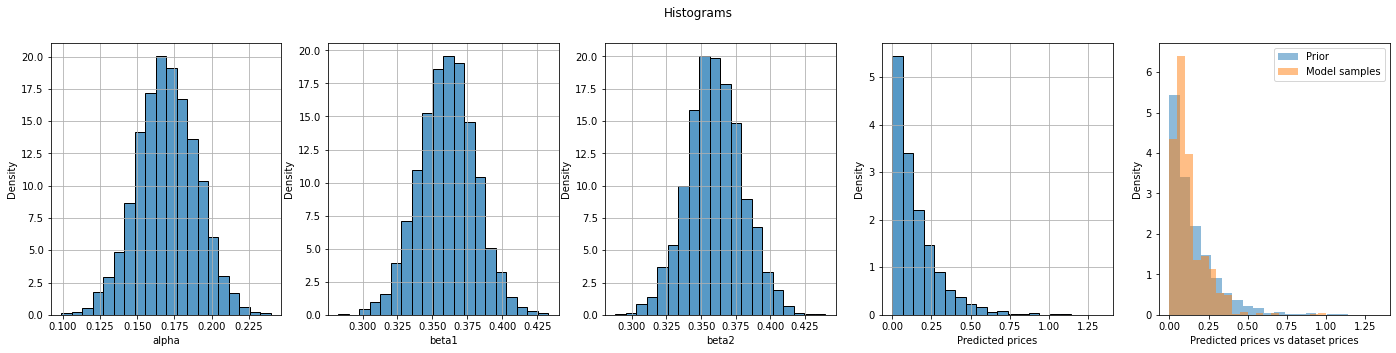

In [12]:
_, ax = plt.subplots(1, 5, figsize=(24, 5))
ax = ax.flatten()
sns.histplot(data=sim_exp_ppc_pd, x="alpha", stat="density", ax=ax[0], bins=BINS)
sns.histplot(data=sim_exp_ppc_pd, x="beta1", stat="density", ax=ax[1], bins=BINS)
sns.histplot(data=sim_exp_ppc_pd, x="beta2", stat="density", ax=ax[2], bins=BINS)
sns.histplot(data=sim_exp_ppc_pd, x="price[1]", stat="density", ax=ax[3], bins=BINS)

ax[4].hist(sim_exp_ppc_pd["price[1]"], bins=BINS, alpha=0.5, density=True, label="Prior")
ax[4].hist(audi_a3_2000ccm_standarized["Price"], bins=BINS, alpha=0.5, density=True, label="Model samples")


ax[0].grid(), 
ax[1].grid(), 
ax[2].grid(), 
ax[3].grid()

ax[0].set_xlabel("alpha"), 
ax[1].set_xlabel("beta1"), 
ax[2].set_xlabel("beta2"), 
ax[3].set_xlabel("Predicted prices"), 
ax[4].set_xlabel("Predicted prices vs dataset prices")

ax[4].set_ylabel("Density")
ax[4].legend()
plt.suptitle("Histograms")
plt.show()

## 2.2 Model 1- posterior

## 2.3 Model 2- prior

## 2.4 Model 2- posterior

# 3. Model comparison